1			2.631037950515747
2			1.5991008281707764
3			1.6040267944335938
4			1.462932825088501
5			1.456266164779663
6			1.4754681587219238
7			1.6305480003356934
8			1.6103200912475586
9			1.492563009262085
10			1.4714305400848389
11			1.5179014205932617
12			2.120454788208008
13			2.0628740787506104
14			2.0364909172058105
15			2.1577653884887695
16			2.2594406604766846
17			2.262118339538574
18			2.5261828899383545
19			2.189465284347534
20			1.9992599487304688


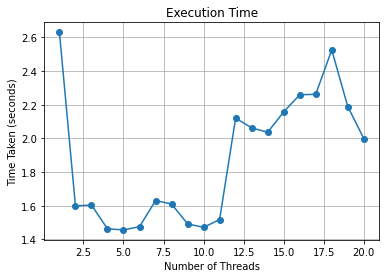

In [7]:
import numpy as np
import time
import threading
import psutil
import matplotlib.pyplot as plt

def matrix_multiply(A, B, result, start_row, end_row):
    for i in range(start_row, end_row):
        result[i] = np.dot(A[i], B)

def multiply_with_threads(A, B, num_threads):
    result = [None] * len(A)
    threads = []
    rows_per_thread = len(A) // num_threads

    for i in range(num_threads):
        start_row = i * rows_per_thread
        end_row = start_row + rows_per_thread if i < num_threads - 1 else len(A)
        thread = threading.Thread(target=matrix_multiply, args=(A, B, result, start_row, end_row))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    return result

def main():
    matrix_size = 1000
    num_matrices = 100
    num_cores = psutil.cpu_count(logical=False)
    max_threads = num_cores * 2

    matrices = [np.random.rand(matrix_size, matrix_size) for _ in range(num_matrices)]
    constant_matrix = np.random.rand(matrix_size, matrix_size)

    execution_times = []
    for num_threads in range(1, max_threads + 1):
        start_time = time.time()
        _ = multiply_with_threads(matrices, constant_matrix, num_threads)
        end_time = time.time()
        elapsed_time = end_time - start_time
        execution_times.append(elapsed_time)
        print(f"{num_threads}\t\t\t{elapsed_time}")

    plt.plot(range(1, max_threads + 1), execution_times, marker='o')
    plt.title("Execution Time")
    plt.xlabel("Number of Threads")
    plt.ylabel("Time Taken (seconds)")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

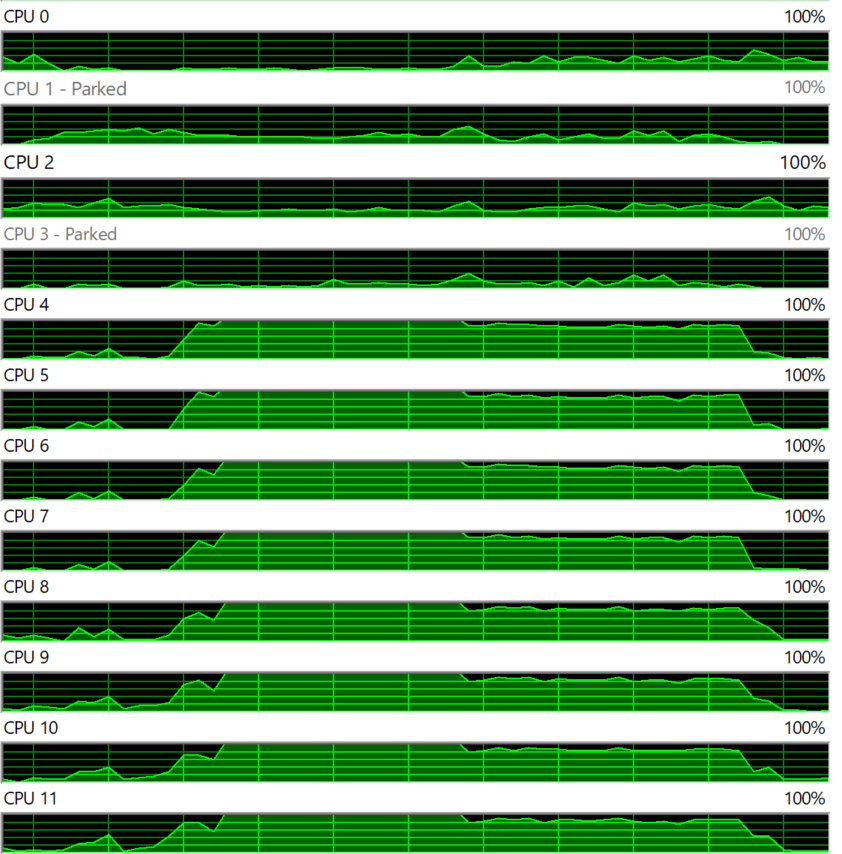